<a href="https://colab.research.google.com/github/Deepayanbasu07/Predicting-Stress-Hotspots-in-FCC-Materials-Using-Machine-Learning-Models/blob/main/Applied_machine_learning_to_predict_stress_hotspots_I_Fcc_materials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link to Research Paper: https://www.sciencedirect.com/science/article/pii/S0749641918302365?via%3Dihub#appsec1

# Project Topic: Predicting Stress Hotspots in FCC Materials Using Machine Learning Models

### Project Overview:
This project aims to predict stress hotspots in face-centered cubic (FCC) materials using machine learning techniques. By leveraging microstructural features such as texture and geometry, we develop predictive models to identify regions prone to high stress under uniaxial tension. The key steps include:

1. Data Preprocessing: The dataset is prepared by calculating relevant crystallographic and geometric features, including Schmid factors, grain sizes, and distances from key microstructural elements.

2. Feature Selection: Advanced feature selection methods, like the FeaLect algorithm, are used to identify the most important features contributing to stress hotspot formation, ensuring minimal correlation bias.

3. Model Development: Random Forest models are trained to predict stress hotspots, with cross-validation used to ensure robust performance across different texture classes.

4. Model Evaluation: Model performance is evaluated using metrics like AUC-ROC, and feature importance is analyzed to gain insights into the key factors contributing to stress hotspots.

5. Discussion: The results are compared to existing literature, and suggestions are made for further improvements, such as including more complex geometric features to reduce model bias.

This project provides a comprehensive approach to applying machine learning for predictive modeling in materials science.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path1 = '/content/drive/MyDrive/MAT DESIGN LABS/LAB2/FCC_grainwise/micro1_all_grainwise.csv'
path2 = '/content/drive/MyDrive/MAT DESIGN LABS/LAB2/FCC_grainwise/micro2_all_grainwise.csv'
path3 = '/content/drive/MyDrive/MAT DESIGN LABS/LAB2/FCC_grainwise/micro3_all_grainwise.csv'
path4 = '/content/drive/MyDrive/MAT DESIGN LABS/LAB2/FCC_grainwise/micro4_all_grainwise.csv'
path5 = '/content/drive/MyDrive/MAT DESIGN LABS/LAB2/FCC_grainwise/micro5_all_grainwise.csv'
path6 = '/content/drive/MyDrive/MAT DESIGN LABS/LAB2/FCC_grainwise/micro6_all_grainwise.csv'

In [ ]:
df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)
df3 = pd.read_csv(path3)
df4 = pd.read_csv(path4)
df5 = pd.read_csv(path5)
df6 = pd.read_csv(path6)

In [ ]:
df1.head()

,Unnamed: 0,Euler_1,Euler_2,Euler_3,AvgMisorientations,EquivalentDiameters,FeatureVolumes,NumCells,Neighborhoods,NumNeighbors,...,001_IPF_1,001_IPF_2,100_IPF_0,100_IPF_1,100_IPF_2,111_IPF_0,111_IPF_1,111_IPF_2,Schmid,fileID
0,0,306.385773,105.531700,52.351406,37.770821,2.590190,9.099001,337.0,2.0,14.0,...,0.427569,0.274501,0.214385,0.460550,0.372547,0.255733,0.607882,0.669000,0.459804,1
1,1,260.891785,116.838242,110.041641,42.026451,2.587626,9.072001,336.0,3.0,14.0,...,0.467399,0.384040,0.542158,0.444626,0.125266,0.060509,0.545659,0.526708,0.497166,1
2,2,305.499298,84.459801,109.093979,40.557442,3.084318,15.363002,569.0,63.0,17.0,...,0.510865,0.470377,0.248346,0.467535,0.376097,0.441562,0.429924,0.196210,0.478242,1
3,3,231.272491,87.973671,133.581345,31.094076,2.417530,7.398001,274.0,1.0,12.0,...,0.558397,0.546043,0.526644,0.429348,0.060637,0.427246,0.507653,0.383033,0.455669,1
4,4,248.549561,63.524712,121.276558,42.817402,3.060647,15.012001,556.0,46.0,16.0,...,0.426146,0.160350,0.409262,0.415742,0.181440,0.178657,0.484543,0.420328,0.450828,1


In [ ]:
df2.head()

,Unnamed: 0,Euler_1,Euler_2,Euler_3,AvgMisorientations,EquivalentDiameters,FeatureVolumes,NumCells,Neighborhoods,NumNeighbors,...,001_IPF_1,001_IPF_2,100_IPF_0,100_IPF_1,100_IPF_2,111_IPF_0,111_IPF_1,111_IPF_2,Schmid,fileID
0,0,212.414978,149.885025,350.666718,18.393324,2.458023,7.776001,288.0,3.0,11.0,...,0.427790,0.216000,0.088479,0.527143,0.497596,0.546267,0.478955,0.242234,0.472029,1
1,1,220.780853,145.320557,1.287807,19.888376,2.420468,7.425001,275.0,3.0,11.0,...,0.437079,0.116525,0.014193,0.575881,0.571655,0.369693,0.458987,0.314934,0.429707,1
2,2,238.939163,147.232849,19.991270,19.680393,2.871172,12.393002,459.0,54.0,16.0,...,0.423570,0.218216,0.195484,0.468521,0.390478,0.307056,0.473820,0.369202,0.468838,1
3,3,221.791870,130.936264,20.895287,21.109108,3.374223,20.115002,745.0,46.0,22.0,...,0.358462,0.102197,0.392196,0.425420,0.223826,0.269520,0.447176,0.332522,0.338212,1
4,4,209.764694,136.529160,352.328705,13.867740,3.015960,14.364001,532.0,55.0,18.0,...,0.416128,0.210395,0.112046,0.513907,0.475562,0.163505,0.497020,0.442879,0.427605,1


In [ ]:
df1.columns

Index(['Unnamed: 0', 'Euler_1', 'Euler_2', 'Euler_3', 'AvgMisorientations',
       'EquivalentDiameters', 'FeatureVolumes', 'NumCells', 'Neighborhoods',
       'NumNeighbors', 'SurfaceFeatures', 'SurfaceAreaVolumeRatio',
       'SharedSurfaceAreaList', 'FeatureBoundaryElementFrac', 'Omega3s',
       'AspectRatios_0', 'AspectRatios_1', 'F7List', 'F1List', 'F1sptList',
       'mPrimeList', 'ngr', 'NeighborList', 'MisorientationList', 'euler_1',
       'euler_2', 'euler_3', 'x', 'y', 'z', 'GBEuc', 'TJEuc', 'QPEuc',
       'Taylor', 'KernelAvg', 'EqVonMisesStress', 'hotspot', '001_IPF_0',
       '001_IPF_1', '001_IPF_2', '100_IPF_0', '100_IPF_1', '100_IPF_2',
       '111_IPF_0', '111_IPF_1', '111_IPF_2', 'Schmid', 'fileID'],
      dtype='object')

Merging all the datasets to get the mixed microstructure model dataset

In [ ]:
df = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index=True)

In [ ]:
df

,Unnamed: 0,Euler_1,Euler_2,Euler_3,AvgMisorientations,EquivalentDiameters,FeatureVolumes,NumCells,Neighborhoods,NumNeighbors,...,001_IPF_1,001_IPF_2,100_IPF_0,100_IPF_1,100_IPF_2,111_IPF_0,111_IPF_1,111_IPF_2,Schmid,fileID
0,0,306.385773,105.531700,52.351406,37.770821,2.590190,9.099001,337.0,2.0,14.0,...,0.427569,0.274501,0.214385,0.460550,0.372547,0.255733,0.607882,0.669000,0.459804,1
1,1,260.891785,116.838242,110.041641,42.026451,2.587626,9.072001,336.0,3.0,14.0,...,0.467399,0.384040,0.542158,0.444626,0.125266,0.060509,0.545659,0.526708,0.497166,1
2,2,305.499298,84.459801,109.093979,40.557442,3.084318,15.363002,569.0,63.0,17.0,...,0.510865,0.470377,0.248346,0.467535,0.376097,0.441562,0.429924,0.196210,0.478242,1
3,3,231.272491,87.973671,133.581345,31.094076,2.417530,7.398001,274.0,1.0,12.0,...,0.558397,0.546043,0.526644,0.429348,0.060637,0.427246,0.507653,0.383033,0.455669,1
4,4,248.549561,63.524712,121.276558,42.817402,3.060647,15.012001,556.0,46.0,16.0,...,0.426146,0.160350,0.409262,0.415742,0.181440,0.178657,0.484543,0.420328,0.450828,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185172,5113,334.624969,12.157960,31.333023,NaN,9.171934,404.000000,404.0,60.0,12.0,...,0.472135,0.362130,0.520610,0.518189,0.354037,0.540177,0.433261,0.049695,0.469769,6
185173,5114,222.782364,40.722195,97.999207,NaN,9.514647,451.000000,451.0,57.0,18.0,...,0.333802,0.107083,0.097527,0.521557,0.488489,0.037156,0.564197,0.554492,0.360760,6
185174,5115,173.611969,28.378084,159.914047,NaN,10.293092,571.000000,571.0,60.0,18.0,...,0.535454,0.510641,0.405448,0.270159,0.047496,0.459233,0.430585,0.180857,0.494740,6
185175,5116,311.733978,30.131001,38.142006,NaN,8.068226,275.000000,275.0,2.0,14.0,...,0.449568,0.152756,0.170262,0.490379,0.431201,0.379467,0.426215,0.234786,0.443159,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185177 entries, 0 to 185176
Data columns (total 48 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  185177 non-null  int64  
 1   Euler_1                     185177 non-null  float64
 2   Euler_2                     185177 non-null  float64
 3   Euler_3                     185177 non-null  float64
 4   AvgMisorientations          180059 non-null  float64
 5   EquivalentDiameters         185177 non-null  float64
 6   FeatureVolumes              185177 non-null  float64
 7   NumCells                    185177 non-null  float64
 8   Neighborhoods               185177 non-null  float64
 9   NumNeighbors                185177 non-null  float64
 10  SurfaceFeatures             185177 non-null  float64
 11  SurfaceAreaVolumeRatio      185177 non-null  float64
 12  SharedSurfaceAreaList       185177 non-null  float64
 13  FeatureBoundar

### Removing the string object type features

In [ ]:
df = df.select_dtypes(exclude=['object'])
df.dtypes

,0
Unnamed: 0,int64
Euler_1,float64
Euler_2,float64
Euler_3,float64
AvgMisorientations,float64
EquivalentDiameters,float64
FeatureVolumes,float64
NumCells,float64
Neighborhoods,float64
NumNeighbors,float64


Dropping Null values for Random forest

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
Euler_1,0
Euler_2,0
Euler_3,0
AvgMisorientations,0
EquivalentDiameters,0
FeatureVolumes,0
NumCells,0
Neighborhoods,0
NumNeighbors,0


In [ ]:
df.columns

Index(['Unnamed: 0', 'Euler_1', 'Euler_2', 'Euler_3', 'AvgMisorientations',
       'EquivalentDiameters', 'FeatureVolumes', 'NumCells', 'Neighborhoods',
       'NumNeighbors', 'SurfaceFeatures', 'SurfaceAreaVolumeRatio',
       'SharedSurfaceAreaList', 'FeatureBoundaryElementFrac', 'Omega3s',
       'AspectRatios_0', 'AspectRatios_1', 'F7List', 'F1List', 'F1sptList',
       'mPrimeList', 'ngr', 'euler_1', 'euler_2', 'euler_3', 'x', 'y', 'z',
       'GBEuc', 'TJEuc', 'QPEuc', 'Taylor', 'KernelAvg', 'EqVonMisesStress',
       'hotspot', '001_IPF_0', '001_IPF_1', '001_IPF_2', '100_IPF_0',
       '100_IPF_1', '100_IPF_2', '111_IPF_0', '111_IPF_1', '111_IPF_2',
       'Schmid', 'fileID'],
      dtype='object')

In [ ]:
df.hotspot.unique()

array([False,  True])

### Using One Hot Encoding to Convert Binary "hotspot" string attribute to int 1 and 0.

In [ ]:
df['hotspot'] = df['hotspot'].astype(int)
df.hotspot.unique()

array([0, 1])

### Getting a basic overview from Correlation Matrix

In [ ]:
df.corr()

,Unnamed: 0,Euler_1,Euler_2,Euler_3,AvgMisorientations,EquivalentDiameters,FeatureVolumes,NumCells,Neighborhoods,NumNeighbors,...,001_IPF_1,001_IPF_2,100_IPF_0,100_IPF_1,100_IPF_2,111_IPF_0,111_IPF_1,111_IPF_2,Schmid,fileID
Unnamed: 0,1.000000,-0.003359,0.007177,-0.019003,-0.000248,-0.001026,-0.000705,-0.000705,-0.001011,-0.001904,...,-0.001932,-0.006076,-0.000248,0.005138,0.002076,-0.012518,0.013219,0.016727,-0.006255,0.001082
Euler_1,-0.003359,1.000000,0.061736,-0.041479,0.108468,-0.000606,-0.000566,-0.000566,0.004616,-0.001933,...,0.051959,0.068604,0.002746,-0.012421,-0.011789,0.010544,0.007123,0.001951,0.055178,-0.004296
Euler_2,0.007177,0.061736,1.000000,0.004944,0.008270,0.000286,-0.000062,-0.000062,0.000984,-0.003046,...,-0.008449,-0.008768,-0.007954,0.006612,0.009263,0.004498,-0.003156,-0.003726,-0.015490,0.007629
Euler_3,-0.019003,-0.041479,0.004944,1.000000,0.005479,0.000167,-0.000103,-0.000103,-0.001132,0.001080,...,0.004675,0.007966,-0.013624,0.011612,0.014103,0.029813,-0.025521,-0.032111,-0.003053,0.000688
AvgMisorientations,-0.000248,0.108468,0.008270,0.005479,1.000000,-0.002169,-0.001907,-0.001907,-0.000532,-0.002143,...,0.110675,0.157277,-0.133612,0.106999,0.150788,0.056003,-0.027529,-0.032733,0.084478,-0.008500
EquivalentDiameters,-0.001026,-0.000606,0.000286,0.000167,-0.002169,1.000000,0.987961,0.987961,0.754528,0.800308,...,0.000945,0.001723,-0.002903,0.001913,0.002418,-0.000903,0.000620,-0.000126,0.002447,-0.001680
FeatureVolumes,-0.000705,-0.000566,-0.000062,-0.000103,-0.001907,0.987961,1.000000,1.000000,0.741049,0.793140,...,0.000778,0.001255,-0.002820,0.002032,0.002235,-0.000932,0.000564,-0.000157,0.001799,-0.001854
NumCells,-0.000705,-0.000566,-0.000062,-0.000103,-0.001907,0.987961,1.000000,1.000000,0.741049,0.793140,...,0.000778,0.001255,-0.002820,0.002032,0.002235,-0.000932,0.000564,-0.000157,0.001799,-0.001854
Neighborhoods,-0.001011,0.004616,0.000984,-0.001132,-0.000532,0.754528,0.741049,0.741049,1.000000,0.622033,...,0.000623,0.000759,-0.002767,0.001672,0.001871,-0.002674,0.002129,0.000262,0.003357,-0.000295
NumNeighbors,-0.001904,-0.001933,-0.003046,0.001080,-0.002143,0.800308,0.793140,0.793140,0.622033,1.000000,...,0.000795,0.000664,-0.001577,0.000169,0.000511,0.000413,0.001255,-0.000516,-0.000068,0.001307


In [ ]:
# Split into Features and Target
X = df.drop(columns=['hotspot'])
y = df['hotspot']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
# fit model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Get feature importances
importances = model.feature_importances_

### Checking the Feature Importances in Ascending Order

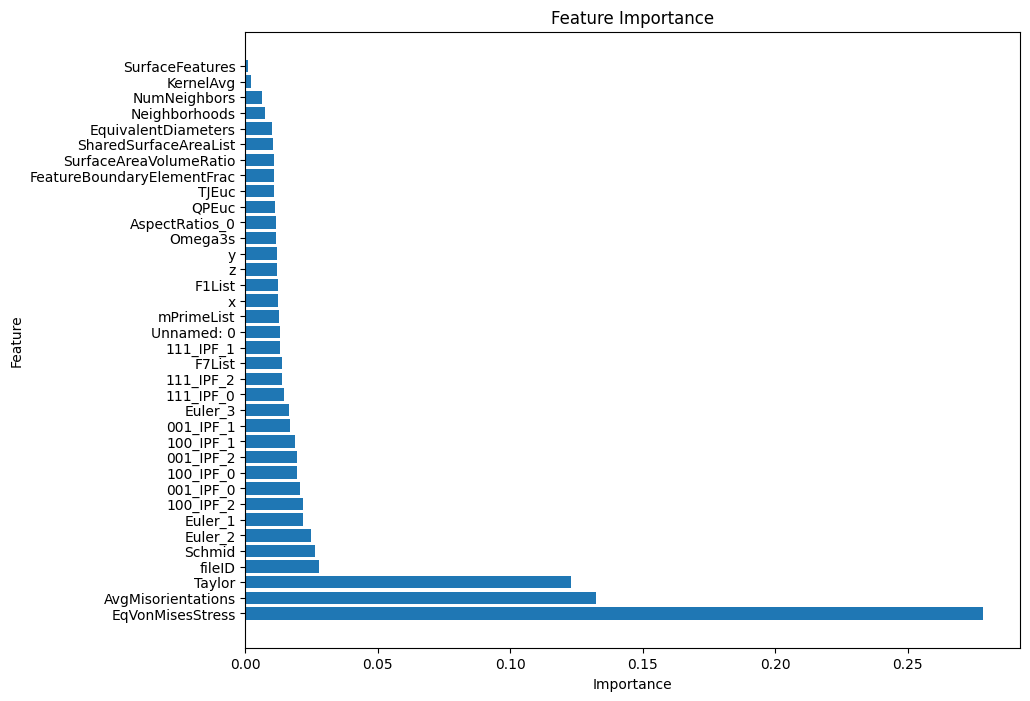

In [ ]:
# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

### Observations:
1. This plot reveals the set of most important (high score) informative features, which have minimum correlation between them.
2. It also tells us the irrelevant features that might be responsible for overfitting in a linear model like LASSO.
3. The third set of features is the low score features which are least informative. However, for the random forest models, we found that removing the low score and irrelevant features do not significantly improve the model performance.

### However,
1. The Schmid factor of the  slip system <110> {111}is the most important feature.
2. The Pearson correlation (
Cohen et al. (2009)
) between the important features and stress hotspots (
Table 2
), and found that hotspots tend to form in grains with lower Schmid factor for FCC materials.

In [ ]:
# Evaluate model accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.96


In [ ]:
# Filter features with importance below 0.05
important_features = feature_importances[feature_importances['Importance'] >= 0.05]['Feature']

# Select only important features in X_train and X_test
X_train_filtered = X_train[important_features]
X_test_filtered = X_test[important_features]

# Re-train the model with filtered features
model_filtered = RandomForestClassifier(n_estimators=100, random_state=42)
model_filtered.fit(X_train_filtered, y_train)

# Evaluate the filtered model
y_pred_filtered = model_filtered.predict(X_test_filtered)
accuracy_filtered = accuracy_score(y_test, y_pred_filtered)
print(f"Filtered Model Accuracy: {accuracy_filtered:.2f}")


Filtered Model Accuracy: 0.96


In [ ]:
important_features

,Feature
24,EqVonMisesStress
4,AvgMisorientations
22,Taylor


### Overfitting
1. Even though we have very high accuracy 96%. Still our model remains practically same once we remove all the features except EqVonMisesStress,AvgMisorientations and	Taylor.
2. This is practically impossible and hence our overfitting problem needs some cross validation.
3. We can also use Stratified-K-Fold Split to make more robust model

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [ ]:
cv = StratifiedKFold(n_splits=5)
y_pred = cross_val_predict(model, X, y, cv=cv, method='predict_proba')
# Calculate ROC curves and AUC for each fold
fpr, tpr, thresholds = roc_curve(y, y_pred[:, 1])
roc_auc = auc(fpr, tpr)

In [ ]:
accuracy_stratified = accuracy_score(y, y_pred[:, 1].round())
print(f"Stratified Cross-Validation Accuracy: {accuracy_stratified:.2f}")

Stratified Cross-Validation Accuracy: 0.88


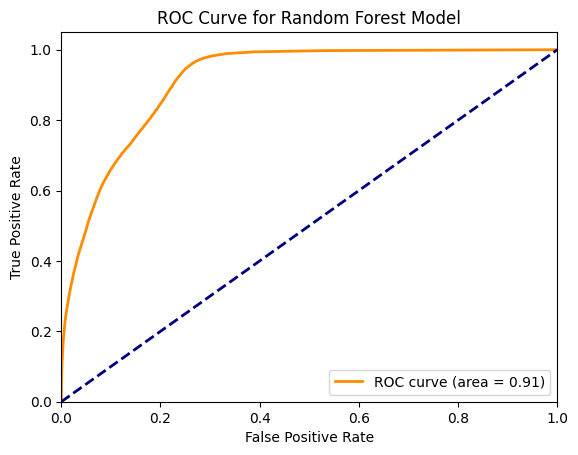

In [ ]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Dashed line represents random chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Model')
plt.legend(loc="lower right")
plt.show()